In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [107]:
data = pd.read_csv('Salary Data.csv')

In [108]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [109]:
data["Job Title"].value_counts()

Job Title
Director of Marketing             12
Director of Operations            11
Senior Business Analyst           10
Senior Marketing Manager           9
Senior Marketing Analyst           9
                                  ..
Junior Social Media Specialist     1
Junior Operations Coordinator      1
Senior HR Specialist               1
Director of HR                     1
Junior Financial Advisor           1
Name: count, Length: 174, dtype: int64

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [111]:
#Verify whether null values present in dataset or not
data.isnull().sum()[data.isnull().sum()>0]

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [112]:
#We will treat null values first
from sklearn.impute import SimpleImputer
# Initialize the imputer with the 'mean' strategy
imputer_numerical = SimpleImputer(strategy='mean')
# Fit the imputer to the column and transform it
data['Age'] = imputer_numerical.fit_transform(data[['Age']]) # we have fillna() as well, to fill data
data['Years of Experience'] = imputer_numerical.fit_transform(data[['Years of Experience']])
data['Salary'] = imputer_numerical.fit_transform(data[['Salary']])

# Initialize the imputer with the 'mode' strategy
imputer_categorical = SimpleImputer(strategy='most_frequent')
data['Gender'] = imputer_categorical.fit_transform(data[['Gender']]).ravel()
data['Education Level'] = imputer_categorical.fit_transform(data[['Education Level']]).ravel()
data['Job Title'] = imputer_categorical.fit_transform(data[['Job Title']]).ravel()

In [113]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [114]:
#Verify whether null values present in dataset or not
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

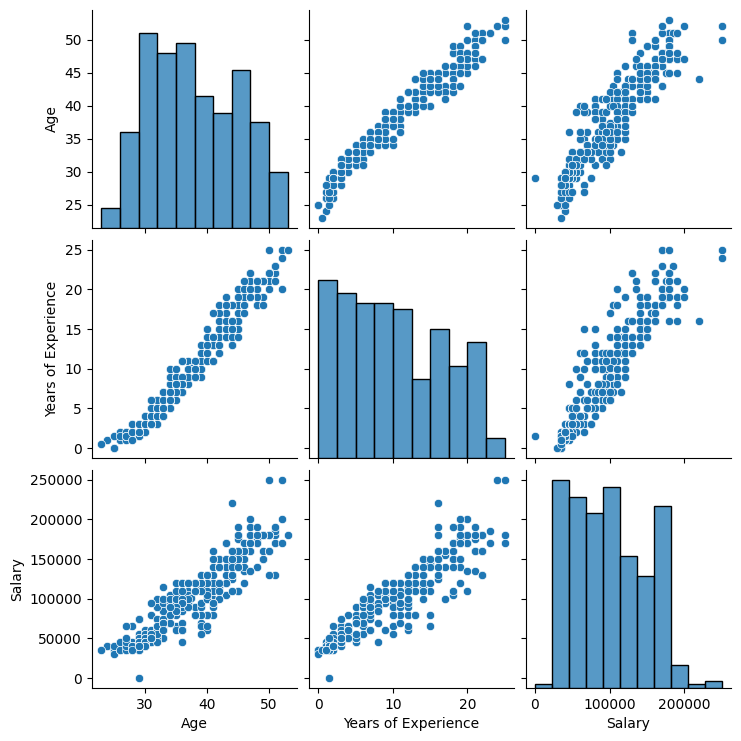

In [115]:
sns.pairplot(data=data)

<Axes: xlabel='Gender', ylabel='count'>

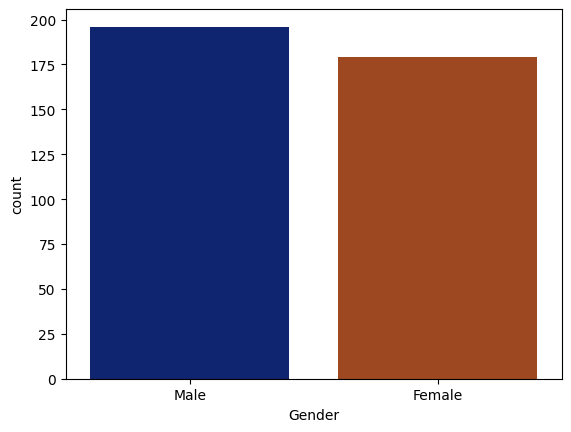

In [116]:
sns.countplot(x="Gender",hue="Gender",data=data,palette="dark")

<Axes: xlabel='Education Level', ylabel='count'>

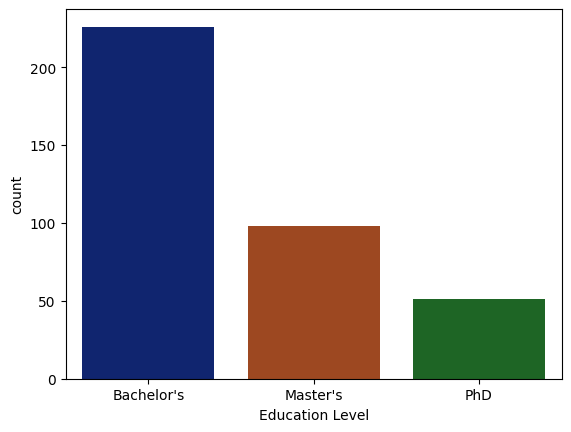

In [56]:
sns.countplot(x="Education Level",hue="Education Level",data=data,palette="dark")

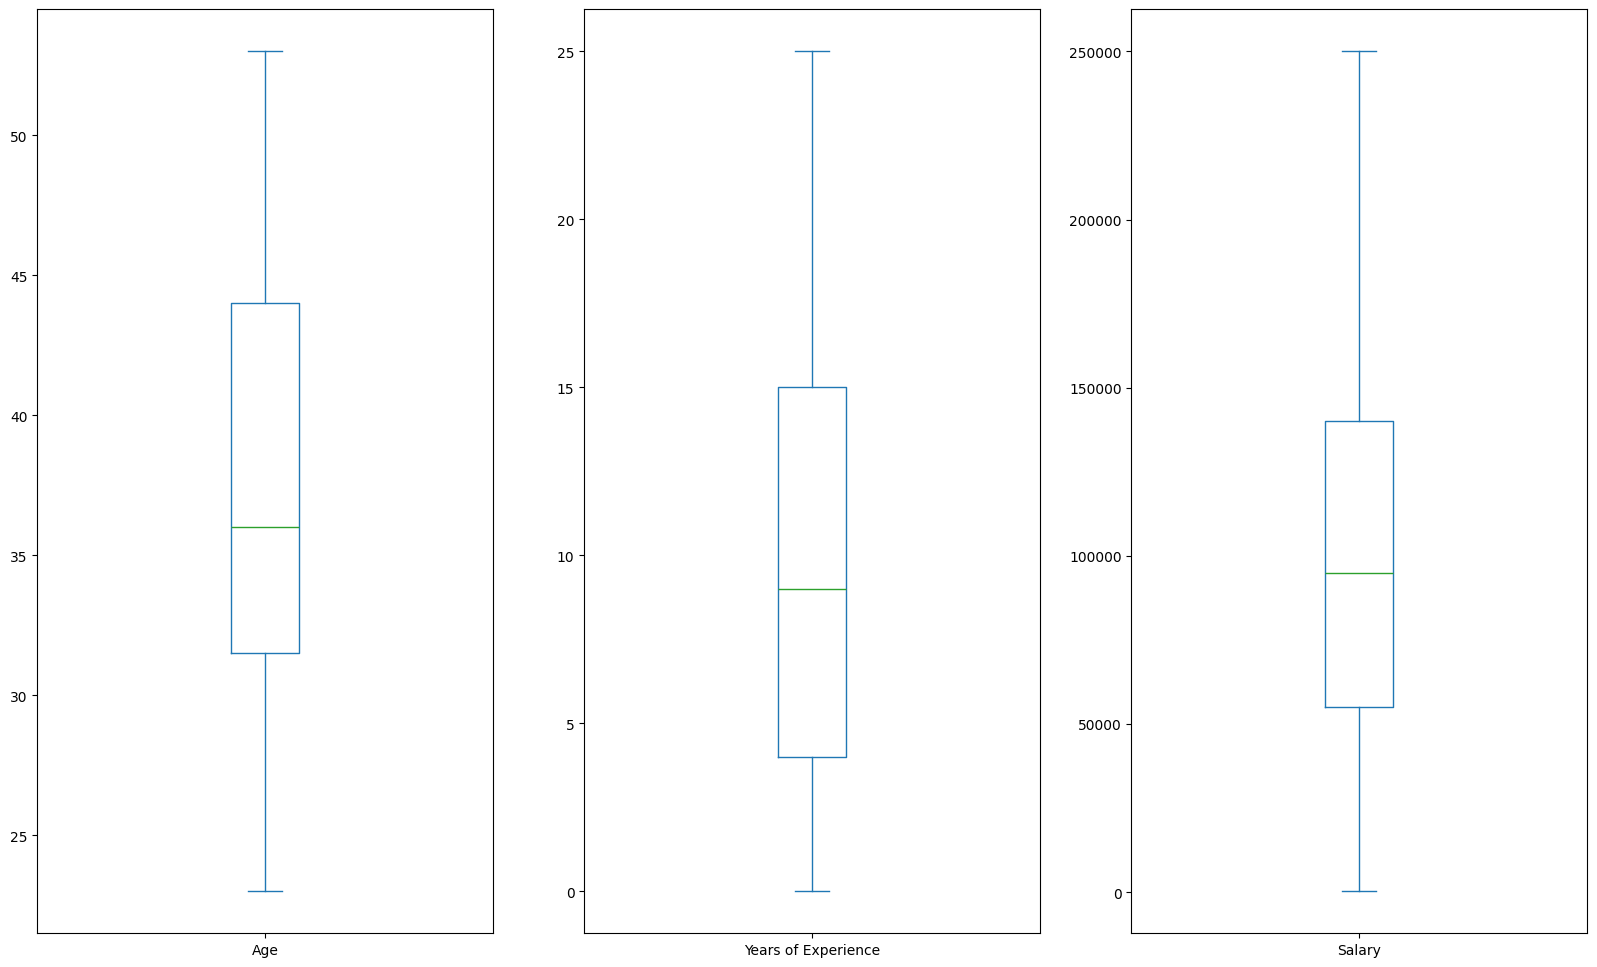

In [117]:
data.plot(kind="box",subplots=True,figsize=(20,12))
plt.show()

In [58]:
data.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0


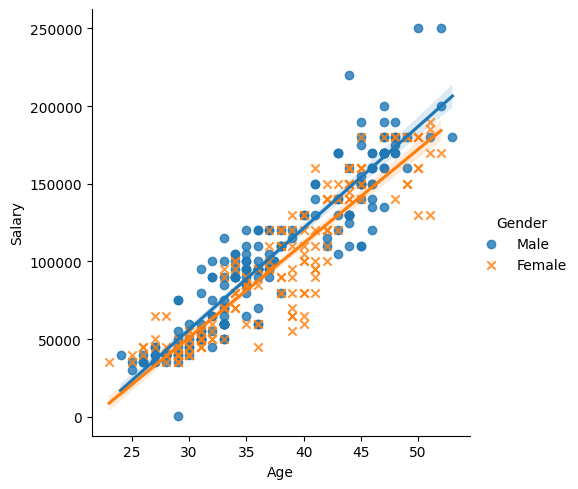

In [62]:
sns.lmplot(x="Age",
            y="Salary",
            hue="Gender",
            data=data,
          markers=['o', 'x'])
plt.show()

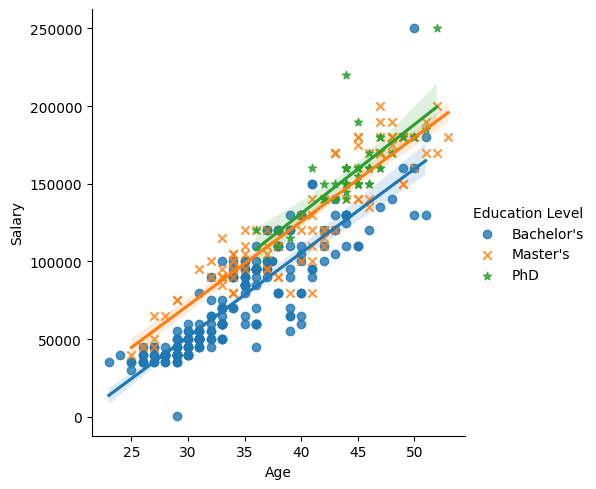

In [65]:
sns.lmplot(x="Age",
            y="Salary",
            hue="Education Level",
            data=data,
          markers=['o', 'x', '*'])
plt.show()

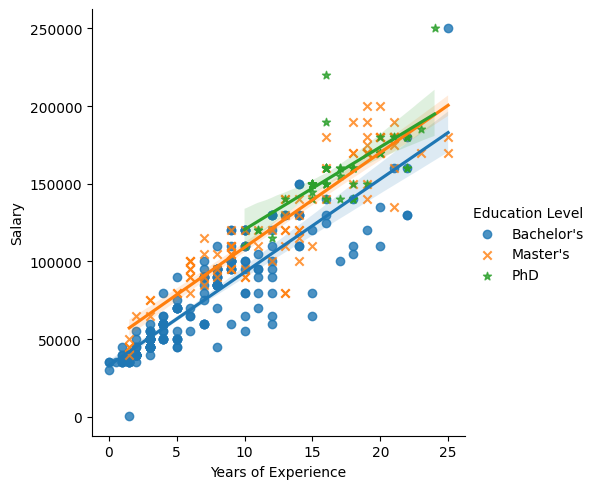

In [66]:
sns.lmplot(x="Years of Experience",
            y="Salary",
            hue="Education Level",
            data=data,
          markers=['o', 'x', '*'])
plt.show()

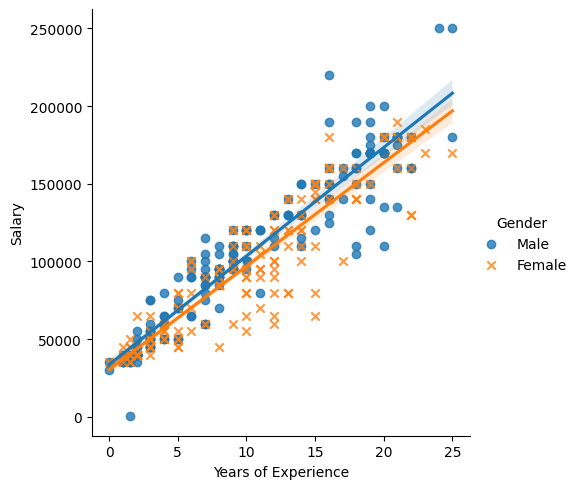

In [68]:
sns.lmplot(x="Years of Experience",
            y="Salary",
            hue="Gender",
            data=data,
          markers=['o', 'x'])
plt.show()

In [118]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data[["Gender"]]=oe.fit_transform(data[["Gender"]])
data[["Education Level"]]=oe.fit_transform(data[["Education Level"]])
data[["Job Title"]]=oe.fit_transform(data[["Job Title"]])

In [119]:
data.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1.0,0.0,159.0,5.0,90000.0
1,28.0,0.0,1.0,17.0,3.0,65000.0


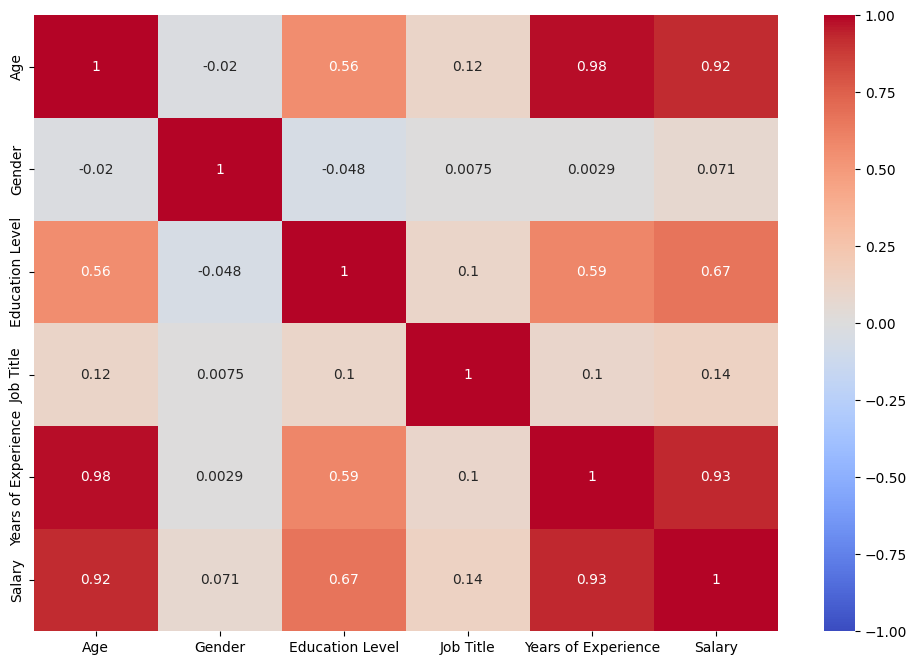

In [120]:
plt.figure(figsize=(12, 8))
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

In [72]:
#Import Libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
#We need to decide best columns for consideration
X = data.drop(columns=["Salary"])
y = data['Salary']

In [123]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [124]:
# Scale features (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [ ]:
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [125]:
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1,1)).ravel()
y_test_scaled  = scaler_y.transform(y_test.to_numpy().reshape(-1,1)).ravel()

In [126]:
X_train_scaled.shape

(300, 5)

In [127]:
y_train_scaled.shape

(300,)

In [128]:
y_test_scaled.shape

(75,)

In [129]:
# Define SVR model
svr = SVR()

In [ ]:
# Define hyperparameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.5, 1]
}

In [131]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1.0,0.0,159.0,5.0,90000.0
1,28.0,0.0,1.0,17.0,3.0,65000.0
2,45.0,1.0,2.0,130.0,15.0,150000.0
3,36.0,0.0,0.0,101.0,7.0,60000.0
4,52.0,1.0,1.0,22.0,20.0,200000.0


In [132]:
# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svr, 
                           param_grid=param_grid, 
                           cv=5,
                           scoring='r2',
                           verbose=2,
                           n_jobs=-1)

In [ ]:
# Fit model
grid_search.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


In [ ]:
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
# Predict with best model
best_svr = grid_search.best_estimator_
y_pred_scaled = best_svr.predict(X_test_scaled)

In [ ]:
# Inverse scale predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()

In [ ]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)